In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [23]:
df= pd.read_csv('/content/drive/MyDrive/Datasets/cardio_train.csv', sep=';')

In [24]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [25]:
df.shape

(70000, 13)

In [26]:
df= df.drop('id', axis=1)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [28]:
df.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [29]:
print(len(pd.unique(df['age'])))

8076


# Convert age in days into age n years

In [51]:
df['age']= (df['age']/365).round()

In [53]:
df.head(7)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0
5,60.0,1,151,67.0,120,80,2,2,0,0,0,0
6,61.0,1,157,93.0,130,80,3,1,0,0,1,0


In [54]:
df['cardio'].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

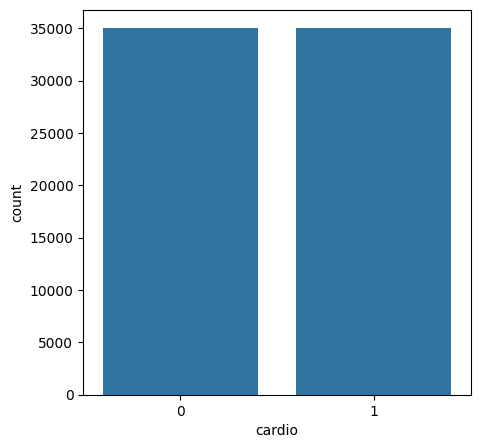

In [55]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.countplot(x='cardio', data=df)
plt.show()


In [56]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,53.338686,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
from sklearn. model_selection import train_test_split


In [58]:
x=df.drop('cardio', axis=1)
y=df['cardio']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=2)

In [59]:
x_train.shape

(56000, 11)

In [60]:
x_test.shape

(14000, 11)

In [61]:
from sklearn.ensemble import RandomForestClassifier
RF= RandomForestClassifier()


# Train the model

In [62]:
RF.fit(x_train,y_train)

RandomForestClassifier()

In [63]:
y_pred= RF.predict(x_test)

In [64]:
from sklearn.metrics import accuracy_score

print("model accuracy:", accuracy_score(y_test, y_pred))

model accuracy: 0.7069285714285715


# Data scaling

In [65]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)

# observe scaled dataframe

In [66]:
x_train_scaled

array([[ 0.39643315, -0.73256144,  0.32076949, ..., -0.31073403,
        -0.23644551, -2.02810782],
       [-1.9693231 , -0.73256144, -0.77314022, ..., -0.31073403,
        -0.23644551, -2.02810782],
       [ 0.69215269, -0.73256144,  0.44231501, ..., -0.31073403,
        -0.23644551,  0.49307043],
       ...,
       [ 1.57931128, -0.73256144,  0.32076949, ..., -0.31073403,
        -0.23644551, -2.02810782],
       [ 0.10071362, -0.73256144, -0.28695813, ..., -0.31073403,
        -0.23644551, -2.02810782],
       [-0.49072544, -0.73256144,  0.07767844, ..., -0.31073403,
        -0.23644551,  0.49307043]])

# training on the scaled data

In [67]:
RF.fit(x_train_scaled, y_train)

RandomForestClassifier()

# Prediction using scaled training

In [68]:
y_pred_scaled= RF.predict(x_test_scaled)

In [69]:
print("accuracy after data scaling:", accuracy_score(y_test,y_pred))

accuracy after data scaling: 0.7069285714285715
